In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from keras.preprocessing.image import ImageDataGenerator


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/abdul/OneDrive/Desktop/lumpy_disease/training/dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 715 images belonging to 2 classes.


In [3]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.41989875 0.3767615  0.01597715]
  [0.41603154 0.3728943  0.01210995]
  [0.41920823 0.37607098 0.01528666]
  ...
  [0.47058827 0.4306358  0.01335711]
  [0.47058827 0.4293343  0.01270635]
  [0.47058827 0.42803276 0.01205558]]

 [[0.4205495  0.37741226 0.01662792]
  [0.4166823  0.37354505 0.01276072]
  [0.4185575  0.37542024 0.01463589]
  ...
  [0.4683135  0.42517623 0.01176471]
  [0.4676627  0.42452544 0.01176471]
  [0.46701193 0.42387468 0.01176471]]

 [[0.42120028 0.37806302 0.01727868]
  [0.4173331  0.3741958  0.01341149]
  [0.41790673 0.37476948 0.01398512]
  ...
  [0.46444628 0.42130902 0.00954429]
  [0.4637955  0.42065823 0.00889352]
  [0.46314475 0.4200075  0.00824276]]

 ...

 [[0.36782825 0.32901216 0.        ]
  [0.3665267  0.32836142 0.        ]
  [0.3652252  0.32771063 0.        ]
  ...
  [0.27998918 0.31920487 0.01190806]
  [0.24525855 0.286121   0.01757031]
  [0.19976223 0.24608429 0.00392157]]

 [[0.3604391  0.32583547 0.        ]
  [0.35978833 0.32648623 0.        ]


In [4]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

validation_generator = validation_datagen.flow_from_directory(
    'C:/Users/abdul/OneDrive/Desktop/lumpy_disease/training/dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 204 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

test_generator = test_datagen.flow_from_directory(
    'C:/Users/abdul/OneDrive/Desktop/lumpy_disease/training/dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 104 images belonging to 2 classes.


In [6]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [8]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [9]:
715/32

22.34375

In [10]:
204/32

6.375

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=22,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20
    
)

Epoch 1/20
22/22 [==============================] - 49s 2s/step - loss: 0.6100 - accuracy: 0.6633 - val_loss: 0.6107 - val_accuracy: 0.6875
Epoch 2/20
22/22 [==============================] - 47s 2s/step - loss: 0.5802 - accuracy: 0.6750 - val_loss: 0.5413 - val_accuracy: 0.6927
Epoch 3/20
22/22 [==============================] - 47s 2s/step - loss: 0.5198 - accuracy: 0.7174 - val_loss: 0.5476 - val_accuracy: 0.7552
Epoch 4/20
22/22 [==============================] - 46s 2s/step - loss: 0.4902 - accuracy: 0.7657 - val_loss: 0.6885 - val_accuracy: 0.5469
Epoch 5/20
22/22 [==============================] - 46s 2s/step - loss: 0.5210 - accuracy: 0.7496 - val_loss: 0.5608 - val_accuracy: 0.7656
Epoch 6/20
22/22 [==============================] - 47s 2s/step - loss: 0.4597 - accuracy: 0.7936 - val_loss: 0.5408 - val_accuracy: 0.7500
Epoch 7/20
22/22 [==============================] - 47s 2s/step - loss: 0.4362 - accuracy: 0.8038 - val_loss: 0.5762 - val_accuracy: 0.7552
Epoch 8/20
22/22 [==

In [12]:
scores = model.evaluate(test_generator)

4/4 [==============================] - 2s 466ms/step - loss: 0.7477 - accuracy: 0.7788


In [13]:
scores

[0.7477222084999084, 0.7788461446762085]

In [14]:
history

In [25]:
history

import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/abdul/OneDrive/Desktop/lumpy_disease/training/dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
    save_to_dir="C:/Users/abdul/OneDrive/Desktop/lumpy_disease/training/AugmentedImages"
)
for image_batch, label_batch in train_generator:
    print(image_batch.shape)
    break
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_

In [15]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 22}

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
class_names = list(train_generator.class_indices.keys())
class_names

['Lumpy Skin', 'Normal Skin']

In [17]:
type(history.history['loss'])

list

In [18]:
len(history.history['loss'])

20

In [19]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.6100286841392517,
 0.5801911950111389,
 0.5197754502296448,
 0.49021604657173157,
 0.5209663510322571]

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [21]:
val_acc

[0.6875,
 0.6927083134651184,
 0.7552083134651184,
 0.546875,
 0.765625,
 0.75,
 0.7552083134651184,
 0.7760416865348816,
 0.7552083134651184,
 0.7604166865348816,
 0.7760416865348816,
 0.8125,
 0.7916666865348816,
 0.796875,
 0.7552083134651184,
 0.8177083134651184,
 0.8177083134651184,
 0.78125,
 0.8125,
 0.765625]

In [22]:
acc

[0.6632503867149353,
 0.6749634146690369,
 0.717423141002655,
 0.765739381313324,
 0.7496339678764343,
 0.7935578227043152,
 0.803806722164154,
 0.8140556216239929,
 0.8067349791526794,
 0.8433381915092468,
 0.833089292049408,
 0.8418740630149841,
 0.8609077334403992,
 0.8784773349761963,
 0.8653001189231873,
 0.8565153479576111,
 0.8770132064819336,
 0.9048316478729248,
 0.9165446758270264,
 0.913616418838501]

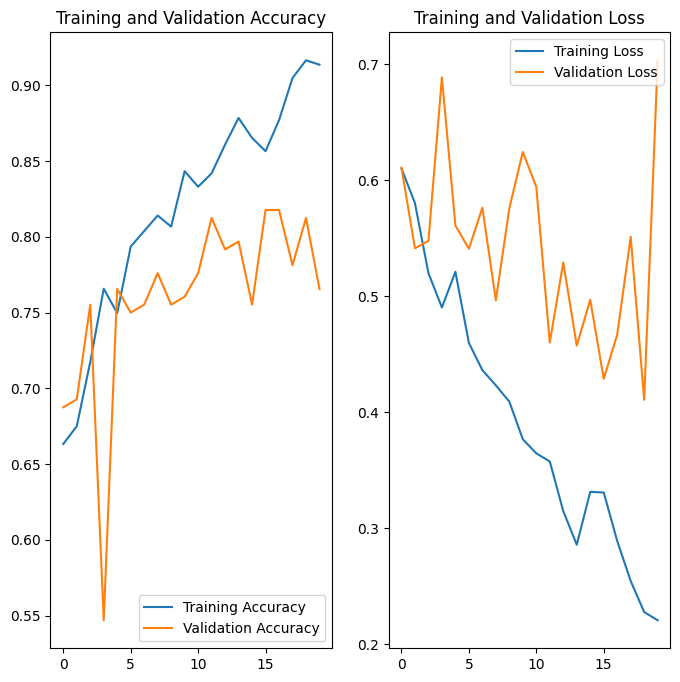

In [23]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
class_names = list(train_generator.class_indices.keys())
class_names

['Lumpy Skin', 'Normal Skin']

first image to predict
actual label: Lumpy Skin
1/1 [==============================] - 1s 535ms/step
predicted label: Normal Skin


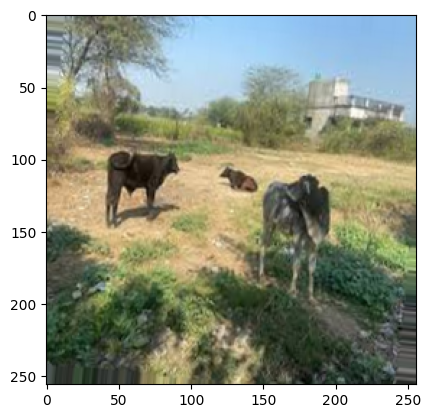

In [26]:

import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [27]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 33ms/step


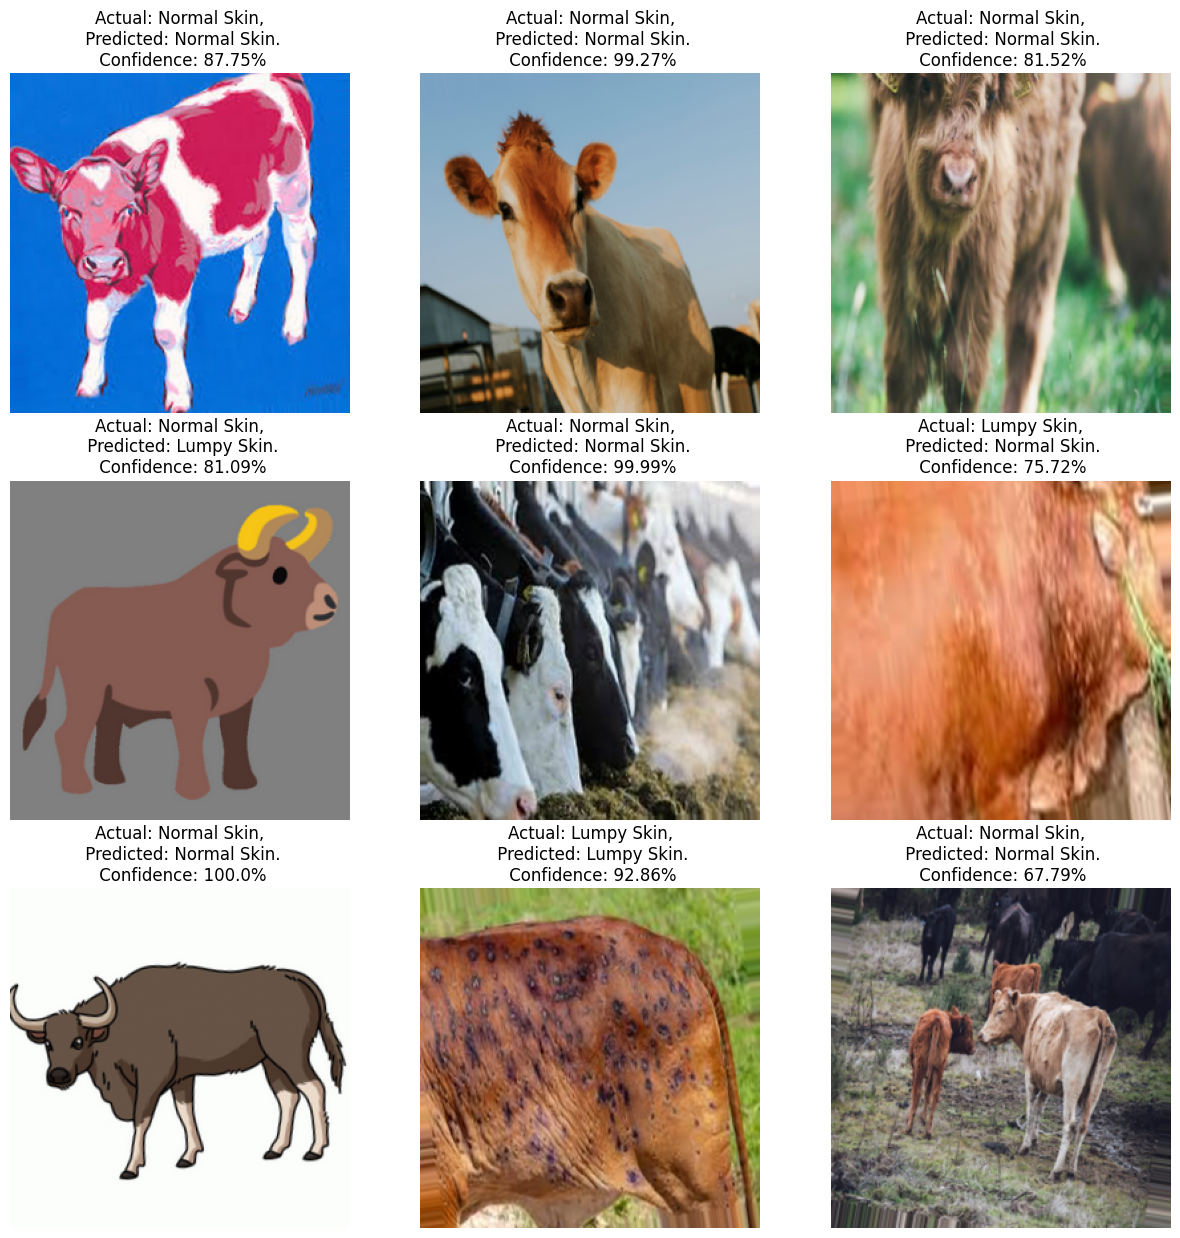

In [28]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [24]:
model.save('C:/Users/abdul/OneDrive/Desktop/lumpy_disease/model/lumpy2.h5')